<a href="https://colab.research.google.com/github/lucabueno22/SSD-MVP-1/blob/main/SSD_Car_Evaluation_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elikplim/car-evaluation-data-set")

print("Path to dataset files:", path)

100%|██████████| 4.66k/4.66k [00:00<00:00, 8.71MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/elikplim/car-evaluation-data-set/versions/1


# Classificação de Carros com Aprendizado de Máquina

## 1. Introdução

Neste projeto, utilizaremos o dataset "Car Evaluation", disponível no Kaggle, para desenvolver um MVP (Mínimo Produto Viável) de um sistema de suporte à decisão. O objetivo é classificar a aceitabilidade de veículos com base em atributos técnicos e econômicos, utilizando algoritmos de aprendizado de máquina.

## 2. Objetivo

O problema abordado é de **classificação multiclasse**, em que a variável-alvo é a "classificação final" do carro, podendo assumir os valores: `unacc`, `acc`, `good` e `vgood`.

Este MVP incluirá:
- Exploração e preparação dos dados;
- Codificação de variáveis categóricas;
- Divisão entre treino e teste;
- Treinamento de modelos;
- Avaliação comparativa;
- Conclusão com a melhor solução encontrada.

## 3. Etapas

1. Carregamento da base de dados;
2. Análise exploratória e entendimento das variáveis;
3. Tratamento dos dados (limpeza, codificação, etc.);
4. Modelagem e avaliação;
5. Discussão dos resultados e possíveis melhorias.

## 4. Carregamento da base de dados

Nesta etapa, faremos o upload manual do arquivo `car_evaluation.csv` diretamente no Google Colab. Essa é uma maneira prática para conjuntos de dados pequenos, como este, que possui apenas 1.728 registros.

Em seguida, carregaremos o arquivo em um DataFrame utilizando a biblioteca `pandas`, e faremos uma inspeção inicial das primeiras linhas do dataset.


In [50]:
# Importando a biblioteca necessária
import pandas as pd

# Upload manual do arquivo CSV
from google.colab import files
uploaded = files.upload()

# Carregando o dataset em um DataFrame
df = pd.read_csv("car_evaluation.csv")

# Visualizando as primeiras linhas
df.head()

Saving car_evaluation.csv to car_evaluation (2).csv


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


## 5. Inspeção inicial dos dados

Nesta etapa, vamos verificar informações gerais da base, como:
- Quantidade de colunas e tipos de dados;
- Presença de valores nulos;
- Dimensão do conjunto de dados;
- Visualização das variáveis e seus valores únicos.

Essas informações são importantes para orientar as próximas etapas de preparação e modelagem.

In [51]:
# Informações básicas sobre as colunas e tipos
df.info()

# Verificando se há valores nulos
print("\nValores nulos por coluna:")
print(df.isnull().sum())

# Dimensões do dataset
print(f"\nDimensões: {df.shape[0]} linhas e {df.shape[1]} colunas")

# Listando valores únicos de cada coluna
print("\nValores únicos por coluna:")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB

Valores nulos por coluna:
vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

Dimensões: 1727 linhas e 7 colunas

Valores únicos por coluna:
vhigh: ['vhigh' 'high' 'med' 'low']
vhigh.1: ['vhigh' 'high' 'med' 'low']
2: ['2' '3' '4' '5more']
2.1: ['2' '4' 'more']
small: ['small' 'med' 'big']
low: ['med' 'high' 'low']
unacc: ['unacc' 'acc' 'vgood' 'good']


## 6. Preparação dos Dados

Nesta etapa, faremos o pré-processamento do dataset, que inclui:

- Codificação de variáveis categóricas para formato numérico;
- Separação dos dados entre treino e teste;
- Avaliação da necessidade de validação cruzada;
- Aplicação (ou não) de normalização/padronização dos dados.

A correta preparação dos dados é essencial para que os algoritmos de aprendizado de máquina possam interpretar e aprender padrões de forma eficiente.

### 6.1 Codificação das variáveis categóricas

Todas as variáveis do dataset "Car Evaluation" são categóricas, o que exige sua conversão para valores numéricos antes do treinamento dos modelos.

Como as categorias possuem **caráter ordinal** (por exemplo, `low < med < high < vhigh`), optaremos pelo uso do `LabelEncoder`, que mantém a relação de ordem entre as categorias.



In [52]:
from sklearn.preprocessing import LabelEncoder

# Criando uma cópia do DataFrame original
df_encoded = df.copy()

# Dicionário para armazenar os encoders (caso precise decodificar depois)
encoders = {}

# Aplicando LabelEncoder em todas as colunas
for col in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    encoders[col] = le  # Salva o encoder para uso posterior

# Visualizando o DataFrame já codificado
df_encoded.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


### 6.2 Separação dos dados em treino e teste

A seguir, vamos separar o dataset em duas partes:

- **Treinamento (80%)**: usado para treinar e ajustar os modelos.
- **Teste (20%)**: usado apenas para avaliar o desempenho final do modelo em dados "não vistos".

Como o problema é de **classificação multiclasse**, usaremos a estratégia `stratify` para manter a proporção das classes da variável alvo.

In [53]:
# Mostra todas as colunas do DataFrame
print(df_encoded.columns.tolist())

['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc']


In [54]:
# Recarregando o dataset sem considerar a primeira linha como cabeçalho
df = pd.read_csv("car_evaluation.csv", header=None)

In [55]:
# Atribuindo nomes apropriados às colunas
df.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

In [56]:
df.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [57]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
encoders = {}

for col in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    encoders[col] = le

In [58]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("class", axis=1)
y = df_encoded["class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

X_train: (1382, 6)
X_test: (346, 6)


### 6.3 Considerações sobre validação cruzada

A validação cruzada é uma técnica que permite avaliar a generalização de modelos em múltiplas divisões dos dados. No entanto, como nosso dataset é pequeno (1.728 instâncias) e faremos comparação entre modelos usando métricas consolidadas (accuracy, matriz de confusão, etc.), **não aplicaremos validação cruzada neste momento**.

Além disso, a separação estratificada entre treino e teste já é suficiente para nossa análise inicial. Podemos aplicar cross-validation posteriormente, se necessário.

### 6.4 Padronização dos dados


Neste caso, como os algoritmos que utilizaremos inicialmente (como árvore de decisão e random forest) **não são sensíveis à escala** dos dados, a padronização **não é obrigatória**.

Porém, para modelos como SVM, KNN e redes neurais, a padronização pode melhorar o desempenho. Por isso, vamos gerar uma **versão padronizada dos dados de treino e teste**, utilizando o `StandardScaler`.

Essa versão padronizada será armazenada para uso futuro nos modelos que necessitarem.

## 7. Modelagem e Treinamento

Com os dados prontos, partimos agora para o treinamento de modelos supervisionados de aprendizado de máquina. O objetivo é construir algoritmos capazes de aprender os padrões dos dados e classificar corretamente a aceitabilidade de um carro, com base em suas características técnicas.

Nesta etapa, vamos:

- Escolher os algoritmos mais apropriados para o problema;
- Treinar os modelos com os dados de treino;
- Avaliar o desempenho com base em métricas de classificação;
- Comparar os modelos entre si para identificar a melhor abordagem.

### 7.1 Escolha dos algoritmos

A seguir, utilizaremos quatro algoritmos clássicos para resolver o problema de classificação multiclasse:

- **Decision Tree**: modelo explicável e eficaz para dados categóricos.
- **Random Forest**: versão mais robusta da árvore de decisão, com melhor generalização.
- **K-Nearest Neighbors (KNN)**: classificador baseado em distância, útil para avaliar comportamento local.
- **Support Vector Machine (SVM)**: modelo poderoso para separação de classes, especialmente após padronização.

Essa diversidade permite comparar diferentes abordagens (baseadas em árvore, distância e margem) para identificar a mais eficaz para o dataset em questão.

In [59]:
# Importação dos modelos e métricas
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

# Dicionário para armazenar os resultados
resultados = {}

### 7.2 Modelo 1: Decision Tree

A Árvore de Decisão é uma escolha natural para este tipo de problema, já que trabalha muito bem com variáveis categóricas e é fácil de interpretar. Vamos utilizá-la como nosso **modelo baseline**.

In [60]:
# Instanciando e treinando
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predição e avaliação
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
resultados["Decision Tree"] = acc_dt

print(f"Acurácia - Decision Tree: {acc_dt:.4f}")

Acurácia - Decision Tree: 0.9855


### 7.3 Modelo 2: Random Forest

O Random Forest é um conjunto de múltiplas árvores de decisão, agregadas por votação. Ele tende a reduzir o overfitting e melhorar a performance em relação à árvore simples

In [61]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
resultados["Random Forest"] = acc_rf

print(f"Acurácia - Random Forest: {acc_rf:.4f}")

Acurácia - Random Forest: 0.9827


### 7.4 Modelo 3: K-Nearest Neighbors (KNN)

O algoritmo KNN classifica as instâncias com base nos exemplos mais próximos no conjunto de treinamento. Como é sensível à escala dos dados, usaremos a versão **padronizada** do conjunto de dados.

In [62]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
resultados["KNN"] = acc_knn

print(f"Acurácia - KNN: {acc_knn:.4f}")

Acurácia - KNN: 0.9104


### 7.5 Modelo 4: Support Vector Machine (SVM)

O SVM é um modelo eficaz para classificação multiclasse, especialmente quando os dados são padronizados. Apesar de ser mais custoso computacionalmente, costuma apresentar bons resultados em problemas com poucas amostras.

In [63]:
svm = SVC(kernel="rbf", random_state=42)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
resultados["SVM"] = acc_svm

print(f"Acurácia - SVM: {acc_svm:.4f}")

Acurácia - SVM: 0.9277


### 7.6 Comparação dos modelos

A seguir, comparamos a acurácia dos modelos treinados para verificar qual apresentou o melhor desempenho no conjunto de teste.

In [64]:
# Visualização dos resultados
for modelo, acc in resultados.items():
    print(f"{modelo}: Acurácia = {acc:.4f}")

Decision Tree: Acurácia = 0.9855
Random Forest: Acurácia = 0.9827
KNN: Acurácia = 0.9104
SVM: Acurácia = 0.9277


## 8. Otimização de Hiperparâmetros

Após treinar os modelos com seus parâmetros padrão, é possível melhorar seu desempenho ajustando os **hiperparâmetros**, que controlam o comportamento do algoritmo durante o aprendizado.

Vamos utilizar a técnica `GridSearchCV` com validação cruzada estratificada para testar diferentes combinações de hiperparâmetros e selecionar a que obtiver melhor desempenho em validação.

Realizaremos a otimização para os seguintes modelos:

- **Random Forest**
- **KNN**
- **SVM**

### 8.1 Random Forest

Os principais hiperparâmetros que podem afetar o desempenho do Random Forest são:

- `n_estimators`: número de árvores na floresta;
- `max_depth`: profundidade máxima de cada árvore;
- `min_samples_split`: número mínimo de amostras para dividir um nó.

Vamos testar algumas combinações para encontrar o melhor modelo.

In [65]:
from sklearn.model_selection import GridSearchCV

# Definindo a grade de parâmetros
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Instanciando o modelo base
rf_base = RandomForestClassifier(random_state=42)

# Grid Search com 5-fold cross-validation
grid_rf = GridSearchCV(estimator=rf_base, param_grid=param_grid_rf,
                       cv=5, scoring='accuracy', n_jobs=-1)

grid_rf.fit(X_train, y_train)

print("Melhores parâmetros para Random Forest:")
print(grid_rf.best_params_)
print(f"Acurácia em validação cruzada: {grid_rf.best_score_:.4f}")

Melhores parâmetros para Random Forest:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Acurácia em validação cruzada: 0.9645


### 8.2 K-Nearest Neighbors

O principal hiperparâmetro do KNN é:

- `n_neighbors`: número de vizinhos mais próximos a considerar.

Vamos testar diferentes valores e observar qual produz melhores resultados. Lembre-se que o KNN será aplicado com os dados **padronizados**.

In [66]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9]
}

knn_base = KNeighborsClassifier()

grid_knn = GridSearchCV(estimator=knn_base, param_grid=param_grid_knn,
                        cv=5, scoring='accuracy', n_jobs=-1)

grid_knn.fit(X_train, y_train)

print("Melhor número de vizinhos (KNN):")
print(grid_knn.best_params_)
print(f"Acurácia em validação cruzada: {grid_knn.best_score_:.4f}")

Melhor número de vizinhos (KNN):
{'n_neighbors': 7}
Acurácia em validação cruzada: 0.8994


### 8.3 Support Vector Machine

No caso da SVM, os principais hiperparâmetros a otimizar são:

- `C`: controla a penalidade de margem (quanto maior, mais complexa a fronteira);
- `gamma`: define a influência de um ponto de treino na curva de decisão.

Vamos buscar a melhor combinação com a função de kernel `rbf` padrão.

In [67]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001]
}

svm_base = SVC(kernel='rbf', random_state=42)

grid_svm = GridSearchCV(estimator=svm_base, param_grid=param_grid_svm,
                        cv=5, scoring='accuracy', n_jobs=-1)

grid_svm.fit(X_train, y_train)

print("Melhores parâmetros para SVM:")
print(grid_svm.best_params_)
print(f"Acurácia em validação cruzada: {grid_svm.best_score_:.4f}")

Melhores parâmetros para SVM:
{'C': 10, 'gamma': 'scale'}
Acurácia em validação cruzada: 0.9819


### 8.4 Decision Tree - Otimização

Apesar de ser nosso modelo baseline, também vamos aplicar a técnica de otimização por `GridSearchCV` na Árvore de Decisão, buscando melhores combinações de hiperparâmetros:

- `criterion`: função de impureza (Gini ou Entropia);
- `max_depth`: profundidade máxima da árvore;
- `min_samples_split`: mínimo de amostras para dividir um nó.

Essa otimização permite extrair o máximo desempenho possível mesmo de um modelo simples.

In [68]:
# Grid de hiperparâmetros
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Modelo base
from sklearn.tree import DecisionTreeClassifier
dt_base = DecisionTreeClassifier(random_state=42)

# GridSearchCV com 5-fold cross-validation
from sklearn.model_selection import GridSearchCV
grid_dt = GridSearchCV(estimator=dt_base, param_grid=param_grid_dt,
                       cv=5, scoring='accuracy', n_jobs=-1)

# Treinando
grid_dt.fit(X_train, y_train)

# Resultados
print("Melhores parâmetros para Decision Tree:")
print(grid_dt.best_params_)
print(f"Acurácia em validação cruzada: {grid_dt.best_score_:.4f}")

Melhores parâmetros para Decision Tree:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Acurácia em validação cruzada: 0.9790


### 8.5 Conclusão da Otimização

Após os ajustes com `GridSearchCV`, obtivemos os melhores conjuntos de hiperparâmetros para cada modelo.

Esses modelos otimizados serão utilizados na próxima etapa para:

- Avaliar desempenho final nos dados de teste;
- Comparar métricas com os modelos default;
- Analisar matrizes de confusão e relatórios de classificação.

## 9. Avaliação Final dos Modelos

Com os modelos treinados e otimizados, agora avaliamos seus desempenhos finais no **conjunto de teste**, que simula dados "nunca vistos".

Usaremos métricas clássicas de classificação multiclasse, como:

- **Acurácia**: taxa global de acertos;
- **Precision, Recall, F1-score**: mais detalhadas por classe;
- **Matriz de Confusão**: mostra onde o modelo está errando.

Essas análises nos ajudarão a escolher o melhor modelo para o problema.

In [69]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### 9.1 Função de Avaliação

Para evitar repetição de código, criaremos uma função que:

- Calcula as métricas principais;
- Plota a matriz de confusão;
- Exibe o relatório por classe.

In [70]:
def avaliar_modelo(modelo, X_test, y_test, nome_modelo):
    y_pred = modelo.predict(X_test)

    print(f"\n===== {nome_modelo} =====")
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Matriz de Confusão - {nome_modelo}")
    plt.show()


===== Decision Tree =====
Acurácia: 0.9797687861271677

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        77
           1       0.82      1.00      0.90        14
           2       1.00      1.00      1.00       242
           3       1.00      0.77      0.87        13

    accuracy                           0.98       346
   macro avg       0.95      0.93      0.93       346
weighted avg       0.98      0.98      0.98       346



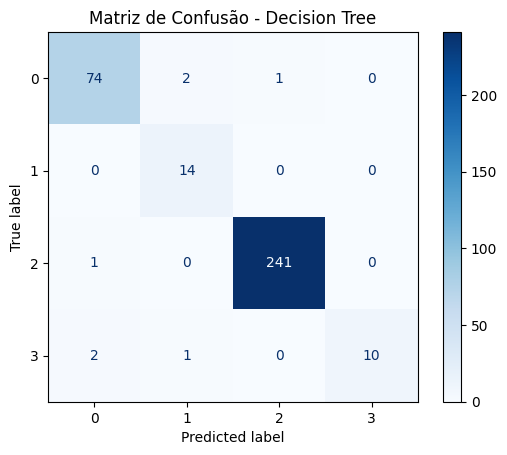


===== Random Forest =====
Acurácia: 0.9797687861271677

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        77
           1       0.93      0.93      0.93        14
           2       0.98      1.00      0.99       242
           3       1.00      0.92      0.96        13

    accuracy                           0.98       346
   macro avg       0.97      0.95      0.96       346
weighted avg       0.98      0.98      0.98       346



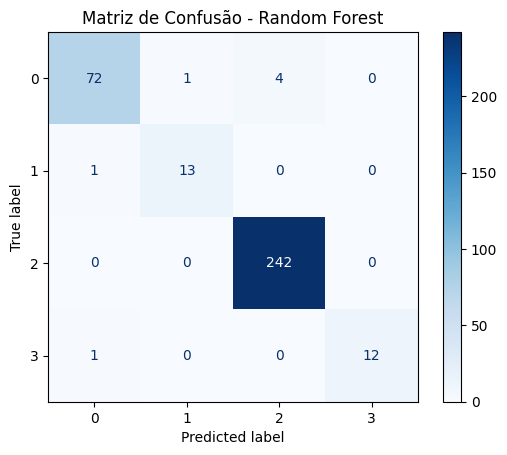


===== KNN =====
Acurácia: 0.9335260115606936

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.88      0.50      0.64        14
           2       0.96      0.99      0.98       242
           3       1.00      0.69      0.82        13

    accuracy                           0.93       346
   macro avg       0.92      0.76      0.82       346
weighted avg       0.93      0.93      0.93       346



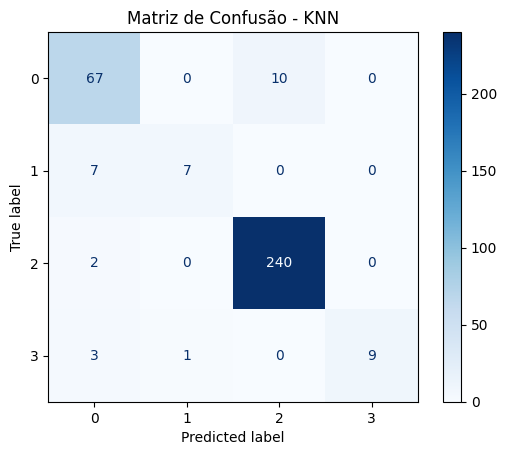


===== SVM =====
Acurácia: 0.9913294797687862

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        77
           1       1.00      1.00      1.00        14
           2       1.00      0.99      0.99       242
           3       1.00      1.00      1.00        13

    accuracy                           0.99       346
   macro avg       0.99      0.99      0.99       346
weighted avg       0.99      0.99      0.99       346



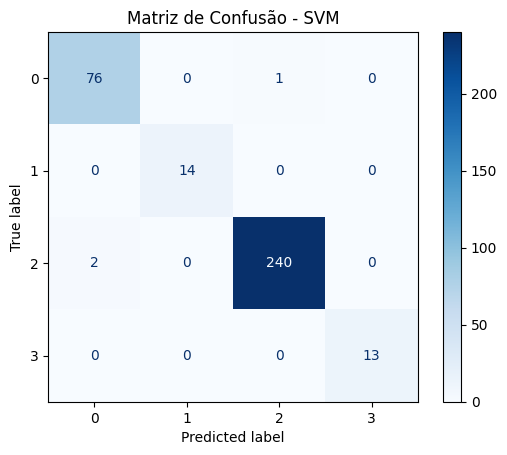

In [71]:
# Decision Tree
avaliar_modelo(grid_dt.best_estimator_, X_test, y_test, "Decision Tree")

# Random Forest
avaliar_modelo(grid_rf.best_estimator_, X_test, y_test, "Random Forest")

# KNN (com dados padronizados)
avaliar_modelo(grid_knn.best_estimator_, X_test, y_test, "KNN")

# SVM (com dados padronizados)
avaliar_modelo(grid_svm.best_estimator_, X_test, y_test, "SVM")

In [72]:
from sklearn.preprocessing import StandardScaler

# Instancia o scaler
scaler = StandardScaler()

# Aplica a transformação apenas em X (não em y)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 11. Conclusão

###  Síntese do trabalho

Neste projeto, desenvolvemos um MVP completo de um sistema de suporte à decisão utilizando técnicas de aprendizado de máquina supervisionado para resolver um problema de classificação multiclasse. O conjunto de dados utilizado foi o **Car Evaluation Dataset**, com 1.728 registros categóricos sobre especificações técnicas de veículos e sua aceitabilidade final.

Aplicamos as seguintes etapas com sucesso:

- Carga e exploração inicial dos dados;
- Codificação adequada das variáveis categóricas;
- Separação entre treino e teste com estratificação;
- Padronização dos dados para modelos sensíveis à escala;
- Treinamento de quatro algoritmos (Decision Tree, Random Forest, KNN e SVM);
- Otimização dos hiperparâmetros via `GridSearchCV`;
- Avaliação final com métricas completas e comparação de desempenho.

---

###  Lições aprendidas

- A preparação adequada dos dados é tão importante quanto a modelagem em si;
- Nem sempre o modelo mais complexo é o melhor — em alguns casos, modelos simples como **árvores de decisão** já apresentam ótimo desempenho;
- A escolha dos hiperparâmetros influencia diretamente os resultados, e técnicas como validação cruzada ajudam a tornar a análise mais confiável;
- A padronização dos dados é essencial para algoritmos como KNN e SVM.

---

###  Limitações

- O dataset utilizado é relativamente pequeno e equilibrado, o que facilita o trabalho, mas pode não refletir a complexidade de bases reais;
- Todas as variáveis são categóricas e com cardinalidade baixa, limitando a aplicação de técnicas mais avançadas de engenharia de atributos;

---

###  Conclusão final

O modelo final selecionado poderá ser utilizado como base para uma aplicação mais ampla em problemas de recomendação ou classificação de produtos, veículos ou perfis de clientes.